In [38]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [39]:
datadir = 'Dataset'

In [40]:
categories = ['without_mask','with_mask']

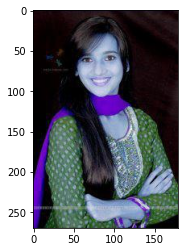

In [41]:
for category in categories:
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array,cmap = 'gray')
        plt.show()
        break
    break    

In [42]:
print(img_array.shape)

(270, 180, 3)


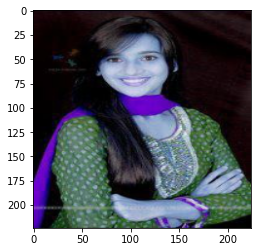

In [43]:
IMG_SIZE = 224

new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [44]:
new_array.shape

(224, 224, 3)

In [45]:
training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(datadir, category)
        class_num = categories.index(category)
        
        
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
            training_data.append([new_array,class_num])
            
create_training_data()            

In [46]:
print(len(training_data))

200


In [47]:
import random

random.shuffle(training_data)

In [50]:
x = []
y = []

for features, labels in training_data:
    x.append(features)
    y.append(labels)
    

x = np.array(x).reshape(-1,IMG_SIZE,IMG_SIZE,3)    
y = np.array(y)

In [51]:
x.shape

(200, 224, 224, 3)

In [52]:
import pickle

pickle_out = open('x.pickle','wb')
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out = open('y.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close()